Testing Factor Analysis
(771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  diab_class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0           0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0           0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN           0
3
-------Computing factor analysis------


 Chi2 Value:  951.8889058135635 
 
 p-value : 2.1178868609666936e-182

 Kmo:  0.5889724809436095

 Confirming the X data : 
    preg   plas  pres  skin  test  mass   pedi   age
0   6.0  148.0  72.0  35.0   0.0  33.6  0.627  50.0
1   1.0   85.0  66.0  29.0   0.0  26.6  0.351  31.0

 Eignen_values: 
 [2.09320571 1.73249367 1.02857586 0.87683489 0.76232881 0.6823905
 0.41899149 0.40517907] 
 Vectors: 
 [ 1.80195184  1.41341318  0.76347253  0.10851948  0.06047585  0.01733659
 -0.02066004 -0.16627792]


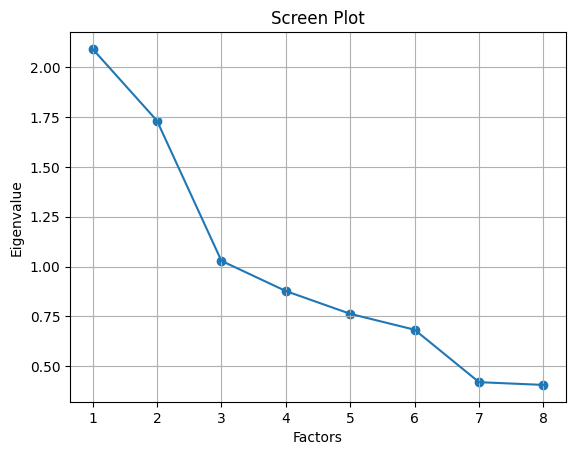

    Factor1   Factor2   Factor3
0 -0.050693  0.575164 -0.020423
1  0.304234  0.258059  0.061241
2 -0.085729  0.194086  0.426896
3  0.199915 -0.221552  0.493635
4  1.116353 -0.077793 -0.221601
5 -0.131765 -0.057757  0.797447
6  0.149728 -0.018961  0.140651
7  0.023342  0.957288 -0.063353

 Factor Variance (array([1.42901275, 1.41030986, 1.1389089 ]), array([0.17862659, 0.17628873, 0.14236361]), array([0.17862659, 0.35491533, 0.49727894]))


In [7]:
import matplotlib.pyplot as plt
#Factor analysis
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis

print('Testing Factor Analysis')


#load the data into a dataframe
header_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diab_class']
my_data = pd.read_csv(r'pima_indians_diabetes_2 (1).csv', names=header_names)

#get the dimension of the shape
print(my_data.shape)

#get the row with empty values
empty_values = my_data[my_data.isna().any(axis=1)]
print(empty_values)
print(len(empty_values))

#use the simple imputer function to replace the empty values in the dataframe
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(my_data)
new_data = imputer.transform(my_data)

'''
#normalise the dataset
diab_data_normalizer = Normalizer(norm='l1').fit(new_data)
my_normalised_data = diab_data_normalizer.transform(new_data)
my_data = pd.DataFrame(my_normalised_data, columns=header_names)
'''
#convert the data back to datframe and bind the headers as required
my_data = pd.DataFrame(new_data, columns=header_names)

#extract the x data - independent variables
X_data = my_data.drop(['diab_class'], axis=1) # for classification
X_regress_data = my_data.drop(['age'], axis=1) # for regression

print('-------Computing factor analysis------\n')
#checking for Factorability
#caculate the chi2 value and the p-value -Barlett's test of sphericity check
#p-value less than .05 represents statistically significance, hence employ a factor analysis

chi_square_value, p_value = calculate_bartlett_sphericity(X_data)
print('\n Chi2 Value: ', chi_square_value, '\n', '\n p-value :', p_value)

#check data suitability for factor analysis
kmo_all, kmo_model = calculate_kmo(X_data)
print('\n Kmo: ', kmo_model) # values susally btw 0 and 1 = KMO below 0.6 are considered inadequate for FA

print('\n Confirming the X data : \n', X_data.head(2))

#implement factor analysis using the factor analyser
fa=FactorAnalyzer()
transformed_X = fa.fit(X_data)

#getting the eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
print('\n Eignen_values: \n', eigen_values, '\n Vectors: \n', vectors) #eigenvalues greater than 1 are considered factors

#create the screen plot for checking number of factors
plt.scatter(range(1, X_data.shape[1]+1), eigen_values)
plt.plot(range(1,X_data.shape[1]+1), eigen_values)
plt.title('Screen Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#load the factors
loadings = fa.loadings_ #we can consider features above 0.5 as high loading rule of thumbs usually 0.7
new_factor =pd.DataFrame(loadings, columns=['Factor1', 'Factor2', 'Factor3'])
print(new_factor)

# get factors variance
fac_variance = fa.get_factor_variance()
print('\n Factor Variance', fac_variance)

